In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sea
from sklearn.decomposition import PCA

In [250]:
data = pd.read_csv('Live.csv')

In [251]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
status_id           7050 non-null object
status_type         7050 non-null object
status_published    7050 non-null object
num_reactions       7050 non-null int64
num_comments        7050 non-null int64
num_shares          7050 non-null int64
num_likes           7050 non-null int64
num_loves           7050 non-null int64
num_wows            7050 non-null int64
num_hahas           7050 non-null int64
num_sads            7050 non-null int64
num_angrys          7050 non-null int64
Column1             0 non-null float64
Column2             0 non-null float64
Column3             0 non-null float64
Column4             0 non-null float64
dtypes: float64(4), int64(9), object(3)
memory usage: 881.4+ KB


In [252]:
data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [253]:
data.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [254]:
data.drop(['Column1','Column2','Column3','Column4', 'status_id'], axis = 1, inplace = True)

In [255]:
data.head()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [256]:
#Label encoding status_type
data['status_type'] = data['status_type'].map(lambda x:1 if(x == 'video') else 0)

In [257]:
data.head()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,0,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,1,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,0,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,0,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [258]:
#converting to date_time object
data['status_published'] = pd.to_datetime(data['status_published'])

In [259]:
data.head()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0
1,0,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0
2,1,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0
3,0,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0
4,0,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0


In [260]:
data['year'] = data['status_published'].dt.year
data['month'] = data['status_published'].dt.month
data['dayofweek'] = data['status_published'].dt.dayofweek
data['hour'] = data['status_published'].dt.hour

data.drop(['status_published'], axis = 1, inplace = True)

In [261]:
data.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year,month,dayofweek,hour
0,1,529,512,262,432,92,3,1,1,0,2018,4,6,6
1,0,150,0,0,150,0,0,0,0,0,2018,4,5,22
2,1,227,236,57,204,21,1,1,0,0,2018,4,5,6
3,0,111,0,0,111,0,0,0,0,0,2018,4,5,2
4,0,213,0,0,204,9,0,0,0,0,2018,4,2,3


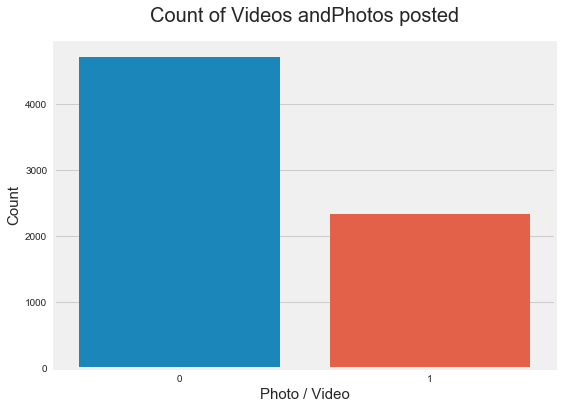

In [262]:
plt.figure(figsize = (8,6))
sea.countplot(data['status_type'])
plt.title('Count of Videos andPhotos posted', fontsize = 20, pad = 20)
plt.xlabel('Photo / Video', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

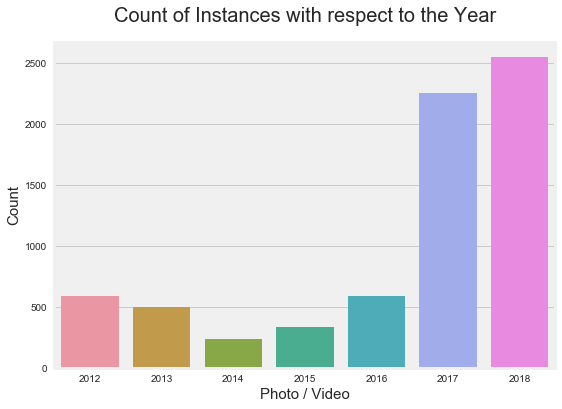

In [263]:
plt.figure(figsize = (8,6))
sea.countplot(data['year'])
plt.title('Count of Instances with respect to the Year', fontsize = 20, pad = 20)
plt.xlabel('Photo / Video', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

from the above plot we can see that the reactions almost tripled in 2017 and 2018 compared to previous years

In [264]:
data.describe()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year,month,dayofweek,hour
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,0.331064,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,2016.382128,6.577730,3.015035,7.829504
std,0.470629,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,1.943176,3.587108,2.012812,6.886893
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012.000000,1.000000,0.000000,0.000000
25%,0.000000,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,3.000000,1.000000,2.000000
50%,0.000000,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,6.000000,3.000000,7.000000
75%,1.000000,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,2018.000000,10.000000,5.000000,9.000000
max,1.000000,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,2018.000000,12.000000,6.000000,23.000000


In [265]:
data_before_2015 = data[data['year'] <= 2015]
data_after_2015 = data[data['year'] > 2015]

In [266]:
data_before_2015.describe()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year,month,dayofweek,hour
count,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.0,1659.0,1659.0,1659.0,1659.0,1659.000000,1659.000000,1659.000000,1659.000000
mean,0.206751,433.142254,13.895720,2.652200,433.142254,0.0,0.0,0.0,0.0,0.0,2013.191682,6.919228,3.109102,8.352019
std,0.405097,733.345816,37.182147,11.795102,733.345816,0.0,0.0,0.0,0.0,0.0,1.127848,3.306533,2.021186,6.989326
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2012.000000,1.000000,0.000000,0.000000
25%,0.000000,20.500000,2.000000,0.000000,20.500000,0.0,0.0,0.0,0.0,0.0,2012.000000,4.000000,1.000000,3.000000
50%,0.000000,51.000000,6.000000,0.000000,51.000000,0.0,0.0,0.0,0.0,0.0,2013.000000,8.000000,3.000000,7.000000
75%,0.000000,440.000000,13.000000,1.000000,440.000000,0.0,0.0,0.0,0.0,0.0,2014.000000,10.000000,5.000000,10.000000
max,1.000000,4710.000000,509.000000,122.000000,4710.000000,0.0,0.0,0.0,0.0,0.0,2015.000000,12.000000,6.000000,23.000000


In [267]:
data_after_2015.describe()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year,month,dayofweek,hour
count,5391.000000,5391.000000,5391.000000,5391.000000,5391.000000,5391.000000,5391.000000,5391.000000,5391.000000,5391.000000,5391.000000,5391.000000,5391.000000,5391.000000
mean,0.369319,167.639214,289.122055,51.522723,147.926359,16.645706,1.686144,0.910777,0.318679,0.148024,2017.363940,6.472640,2.986088,7.668707
std,0.482665,312.850929,1008.366526,148.472714,282.190107,44.993579,9.938073,4.503762,1.819932,0.828065,0.670606,3.663026,2.009530,6.847698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,1.000000,0.000000,0.000000
25%,0.000000,15.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,3.000000,1.000000,2.000000
50%,0.000000,63.000000,3.000000,0.000000,60.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,6.000000,3.000000,7.000000
75%,1.000000,204.000000,52.500000,9.500000,168.000000,7.000000,1.000000,0.000000,0.000000,0.000000,2018.000000,10.000000,5.000000,9.000000
max,1.000000,4410.000000,20990.000000,3424.000000,4315.000000,657.000000,278.000000,157.000000,51.000000,31.000000,2018.000000,12.000000,6.000000,23.000000


In [274]:
#storing different reactions in the variable to perform EDA
reactions = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas',
            'num_sads', 'num_angrys']

In [269]:
data_before_2015.groupby('year').sum()[reactions]

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
year,,,,,,,,,
2012,12389,4053,110,12389,0,0,0,0,0
2013,45524,3018,513,45524,0,0,0,0,0
2014,141631,4623,841,141631,0,0,0,0,0
2015,519039,11359,2936,519039,0,0,0,0,0


In [270]:
data_after_2015.groupby('year').sum()[reactions]

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
year,,,,,,,,,
2016,105220,61065,4105,101501,2803,424,150,329,13
2017,259280,731519,90793,227617,27497,1732,1506,646,263
2018,539243,766073,182861,468353,59437,6934,3254,743,522


In [271]:
data_before_2015.groupby('status_type').mean()[reactions]

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
status_type,,,,,,,,,
0,364.448328,12.436930,1.869301,364.448328,0.0,0.0,0.0,0.0,0.0
1,696.702624,19.492711,5.655977,696.702624,0.0,0.0,0.0,0.0,0.0


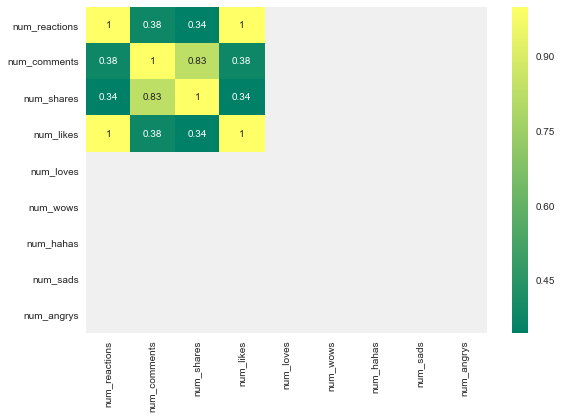

In [272]:
plt.figure(figsize = (8,6))
sea.heatmap(data_before_2015[reactions].corr(), annot = True, cmap = 'summer')

We can see that comments and shares are closely correlated features

In [215]:
data_after_2015.groupby('status_type').mean()[reactions]

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
status_type,,,,,,,,,
0,141.539412,19.352647,2.853529,138.012353,1.995882,0.992941,0.252941,0.221176,0.060294
1,212.209442,749.803114,134.634355,164.856354,41.662983,2.869915,2.034154,0.485183,0.297840


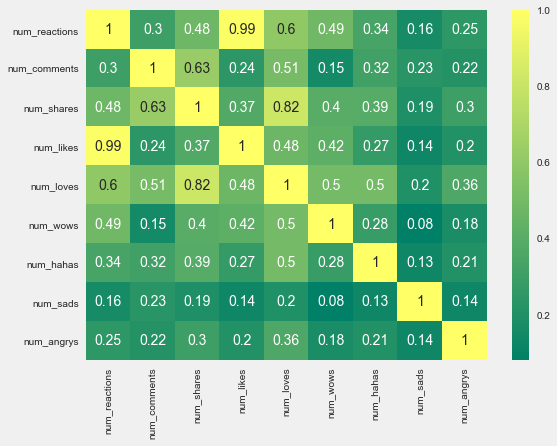

In [216]:
plt.figure(figsize = (8,6))
sea.heatmap(data_after_2015[reactions].corr(), annot = True, cmap = 'summer')

In [217]:
data_before_2015.groupby(['year', 'status_type']).sum()[reactions]

num_reactions  num_comments  num_shares  num_likes  \
year status_type                                                       
2012 0                    12389          4053         110      12389   
2013 0                    23086          2070         207      23086   
     1                    22438           948         306      22438   
2014 0                     3517            91          28       3517   
     1                   138114          4532         813     138114   
2015 0                   440622         10153        2115     440622   
     1                    78417          1206         821      78417   

                  num_loves  num_wows  num_hahas  num_sads  num_angrys  
year status_type                                                        
2012 0                    0         0          0         0           0  
2013 0                    0         0          0         0           0  
     1                    0         0          0         0           0  
2014 0                    0         0          0         0           0  
     1                    0         0          0         0           0  
2015 0                    0         0          0         0           0  
     1                    0         0          0         0           0

In [218]:
data_after_2015.groupby(['year', 'status_type']).sum()[reactions]

num_reactions  num_comments  num_shares  num_likes  \
year status_type                                                       
2016 0                    85825          3508        3159      84077   
     1                    19395         57557         946      17424   
2017 0                   136356         35907        2550     132294   
     1                   122924        695612       88243      95323   
2018 0                   259053         26384        3993     252871   
     1                   280190        739689      178868     215482   

                  num_loves  num_wows  num_hahas  num_sads  num_angrys  
year status_type                                                        
2016 0                 1075       315         72       285           1  
     1                 1728       109         78        44          12  
2017 0                 2590       965        219       190          85  
     1                24907       767       1287       456         178  
2018 0                 3121      2096        569       277         119  
     1                56316      4838       2685       466         403

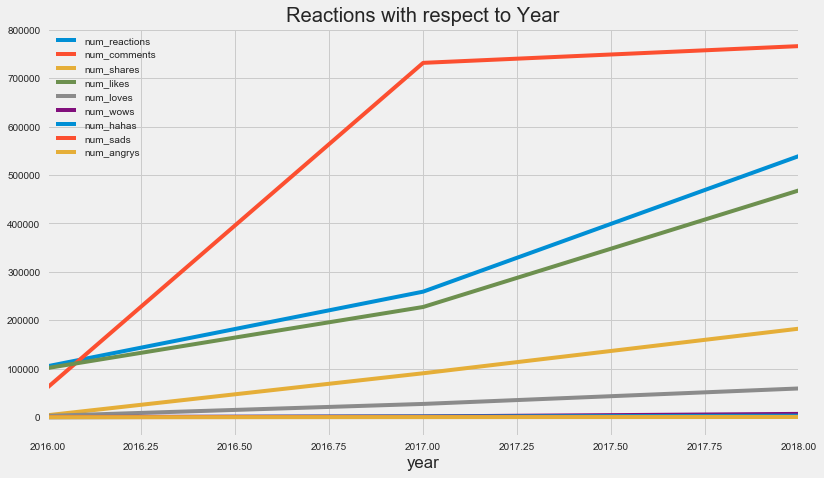

In [219]:
data_after_2015.groupby('year').sum()[reactions].plot(figsize = (12,7), title = 'Reactions with respect to Year')
plt.show()

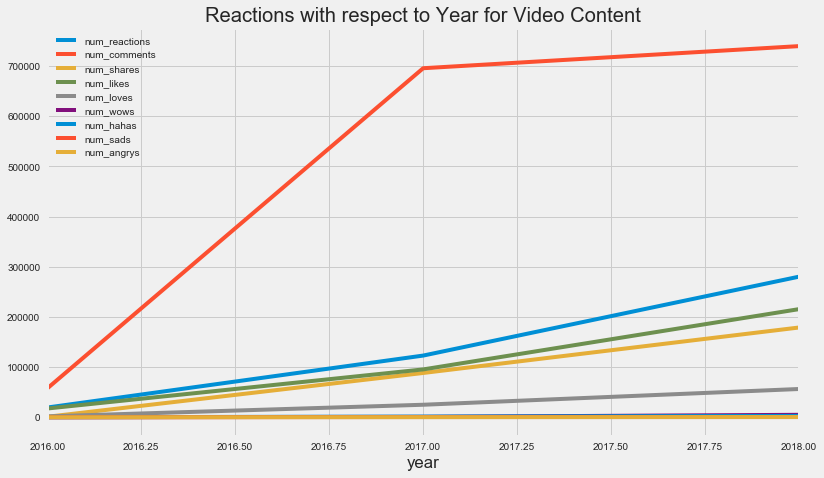

In [220]:
data_after_2015[data_after_2015['status_type'] == 1].groupby('year').sum()[reactions].plot(figsize = (12,7), title = 'Reactions with respect to Year for Video Content')
plt.show()


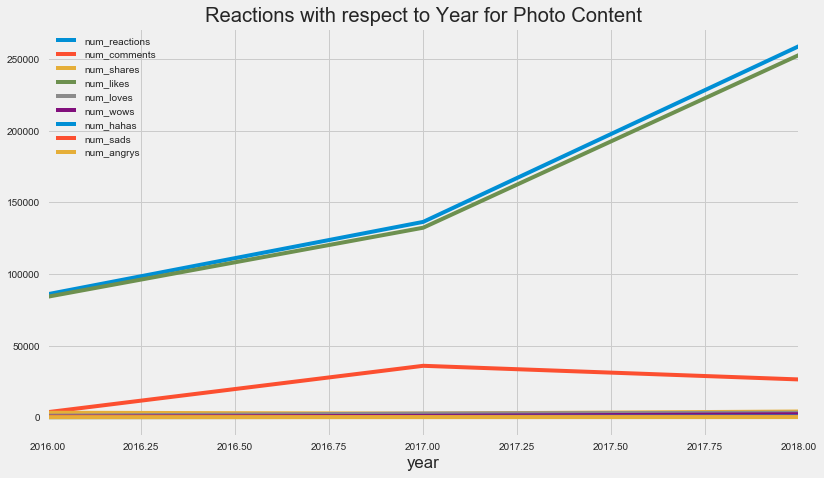

In [221]:
data_after_2015[data_after_2015['status_type'] == 0].groupby('year').sum()[reactions].plot(figsize = (12,7), title = 'Reactions with respect to Year for Photo Content')
plt.show()


We can clearly see that number of reactions and likes are much higher compared to Video content

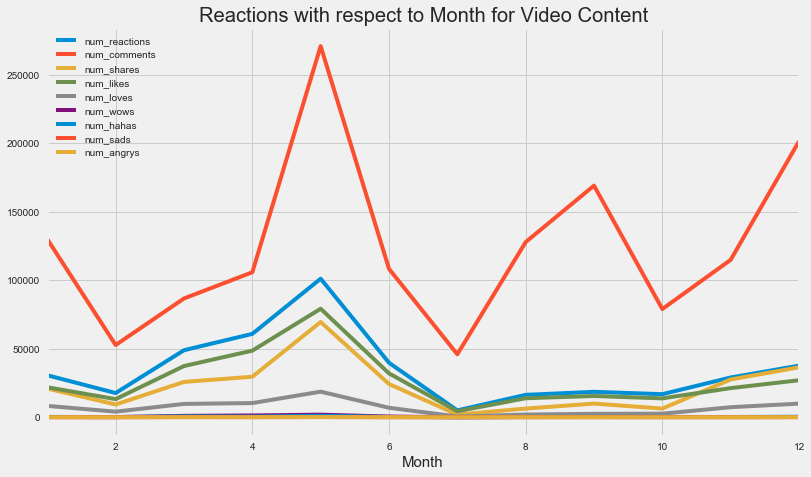

In [242]:
data_after_2015[data_after_2015['status_type'] == 1].groupby('month').sum()[reactions].plot(figsize = (12,7), title = 'Reactions with respect to Month for Video Content')
plt.xlabel('Month', fontsize = 15)
plt.show()


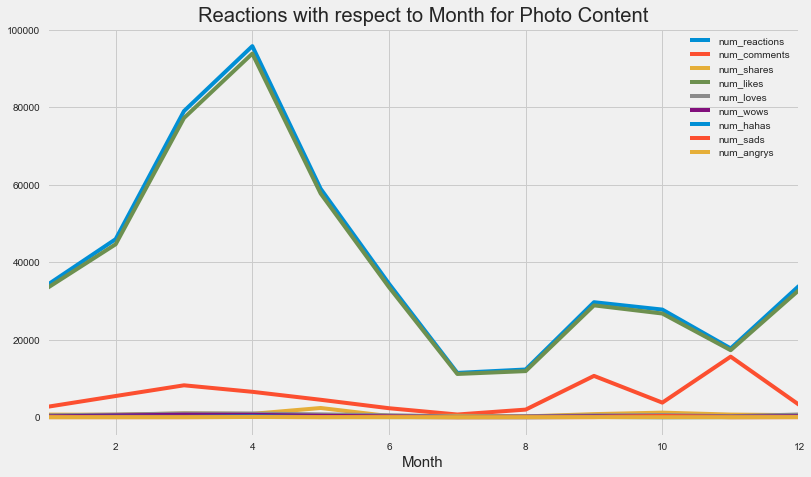

In [241]:
data_after_2015[data_after_2015['status_type'] == 0].groupby('month').sum()[reactions].plot(figsize = (12,7), title = 'Reactions with respect to Month for Photo Content')
plt.xlabel('Month', fontsize = 15)
plt.show()


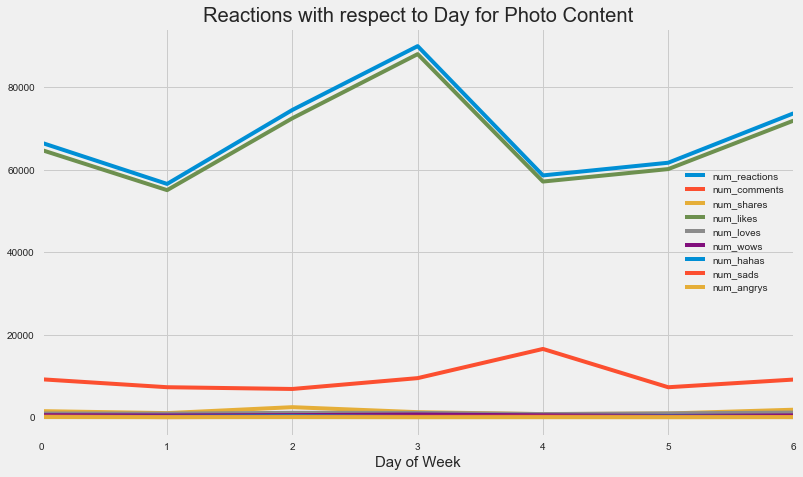

In [240]:
data_after_2015[data_after_2015['status_type'] == 0].groupby('dayofweek').sum()[reactions].plot(figsize = (12,7), title = 'Reactions with respect to Day for Photo Content')
plt.xlabel('Day of Week', fontsize = 15)
plt.show()


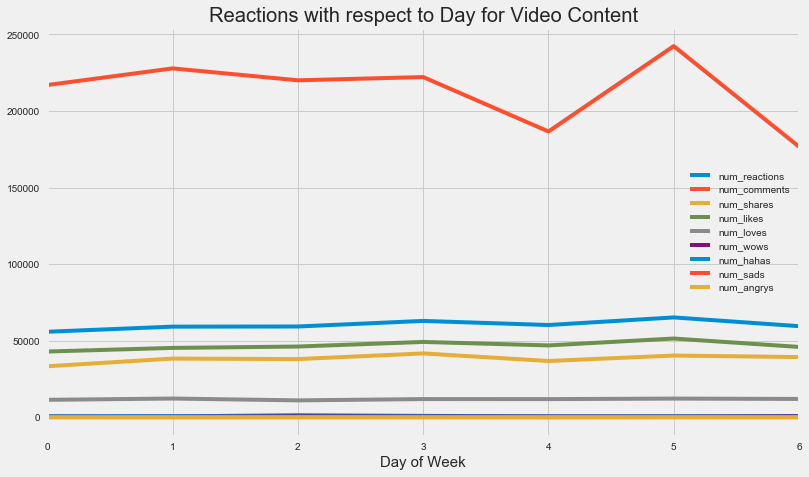

In [239]:
data_after_2015[data_after_2015['status_type'] == 1].groupby('dayofweek').sum()[reactions].plot(figsize = (12,7), title = 'Reactions with respect to Day for Video Content')
plt.xlabel('Day of Week', fontsize = 15)
plt.show()


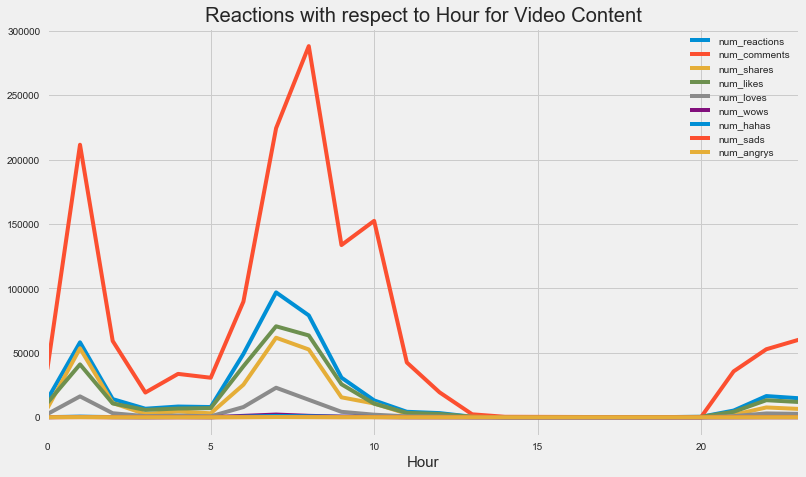

In [238]:
data_after_2015[data_after_2015['status_type'] == 1].groupby('hour').sum()[reactions].plot(figsize = (12,7), title = 'Reactions with respect to Hour for Video Content')
plt.xlabel('Hour', fontsize = 15)
plt.show()


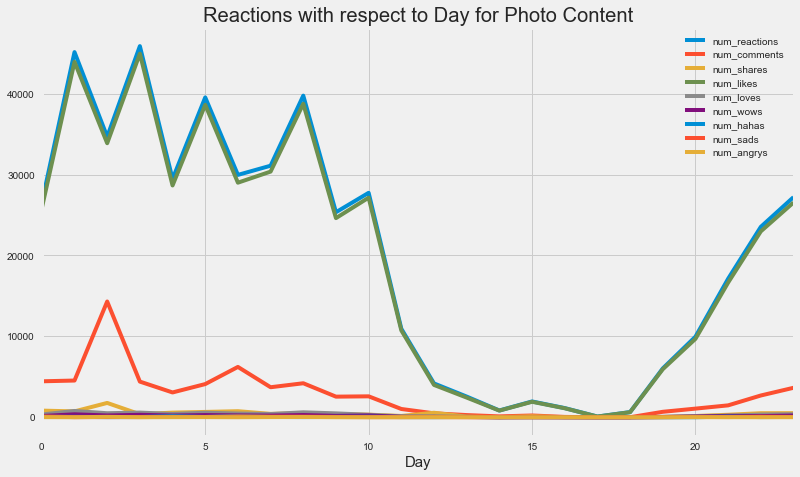

In [237]:
data_after_2015[data_after_2015['status_type'] == 0].groupby('hour').sum()[reactions].plot(figsize = (12,7), title = 'Reactions with respect to Day for Photo Content')
plt.xlabel('Day', fontsize = 15)
plt.show()


In [273]:
data_reactions = data.drop(['status_type','year','month','dayofweek','hour'], axis = 1)

In [246]:
pca = PCA(n_components = 2, random_state = 42)
data = pca.fit_transform(data_reactions)
explained_variance = pca.explained_variance_ratio_

In [247]:
explained_variance

array([0.66306805, 0.3273235 ])

In [248]:
loadings = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':reactions})

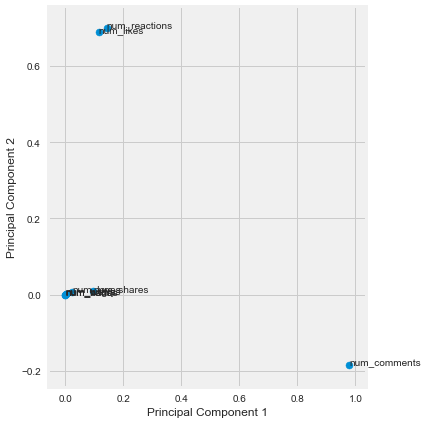

In [249]:
fig = plt.figure(figsize = (6,6))
plt.scatter(loadings.PC1, loadings.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(loadings.Feature):
    plt.annotate(txt, (loadings.PC1[i],loadings.PC2[i]))
plt.tight_layout()
plt.show()

In [140]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import time

In [133]:
X = data.iloc[:,:].values

In [136]:
sc = StandardScaler()
X = sc.fit_transform(X)

## Choosing optimal K value 

## Method 1

Total time taken : 3.3602869510650635


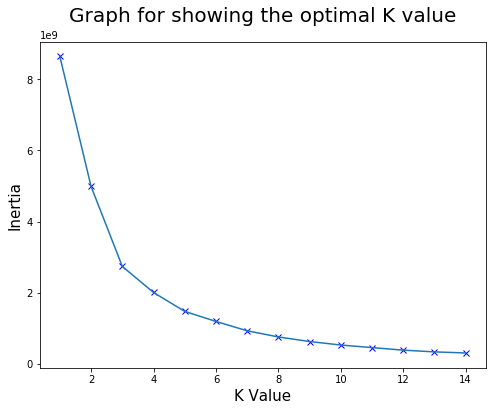

In [141]:
start_time = time.time()
SSD = []

for i in range(1,15):
    clf = KMeans(n_clusters = i)
    clf.fit(data)
    SSD.append(clf.inertia_)
print('Total time taken : {}'.format(time.time() - start_time))

plt.figure(figsize = (8,6))
plt.plot(range(1,15), SSD, 'bx')
plt.plot(range(1,15), SSD)
plt.xlabel('K Value', fontsize = 15)
plt.ylabel('Inertia', fontsize = 15)
plt.title('Graph for showing the optimal K value', fontsize = 20, pad = 20)
plt.show()

## Method - 2

In [142]:
from sklearn.metrics import silhouette_score, silhouette_samples

for n_clusters in range(2,15):
    km = KMeans (n_clusters=n_clusters)
    preds = km.fit_predict(data)
    centers = km.cluster_centers_

    score = silhouette_score(data, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.8719833098058268
For n_clusters = 3, silhouette score is 0.8116541747589041
For n_clusters = 4, silhouette score is 0.81706178891894
For n_clusters = 5, silhouette score is 0.7844025229721787
For n_clusters = 6, silhouette score is 0.7589863274331975
For n_clusters = 7, silhouette score is 0.7600545740114721
For n_clusters = 8, silhouette score is 0.7602828328648747
For n_clusters = 9, silhouette score is 0.6540237336326545
For n_clusters = 10, silhouette score is 0.6786244478822568
For n_clusters = 11, silhouette score is 0.6785843470575585
For n_clusters = 12, silhouette score is 0.6810643193762373
For n_clusters = 13, silhouette score is 0.6919831888913109
For n_clusters = 14, silhouette score is 0.6549700031700081


## Method - 3

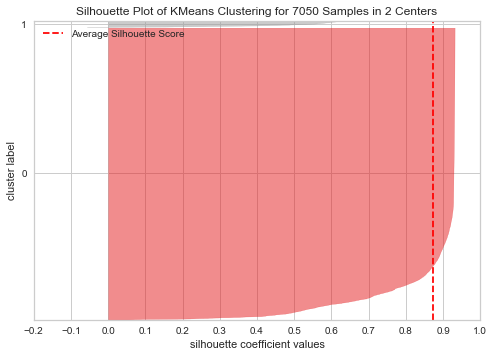

In [153]:
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
km = KMeans(n_clusters=2)
visualizer = SilhouetteVisualizer(km)

visualizer.fit(data) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data

## Defining K means Model

In [159]:
def model(data):
    #defining number of cluster you want
    n_clusters = 2

    clf = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 100)
    clf.fit(data)
    
    print('The centroids for the clusters are: \n')
    print(clf.cluster_centers_)
    
    y_pred = clf.predict(data)
    
    return y_pred, clf.cluster_centers_ 


In [160]:
y_pred, clusters = model(data)

The centroids for the clusters are: 

[[3.17556810e-01 2.24142278e+02 1.22109857e+02 3.08061948e+01
  2.11227529e+02 1.09083804e+01 1.15298886e+00 5.56809958e-01
  1.97423650e-01 9.63960052e-02 2.01636185e+03 6.56202055e+00
  3.01780287e+00 7.81458967e+00]
 [9.92907801e-01 5.22886525e+02 5.23441844e+03 4.91624113e+02
  4.02007092e+02 1.01921986e+02 7.97163121e+00 7.53900709e+00
  2.51063830e+00 9.36170213e-01 2.01737589e+03 7.34751773e+00
  2.87943262e+00 8.56028369e+00]]


## Applying Agglomerative Clustering

In [154]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

In [277]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit(data)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2,
                        pooling_func='deprecated')

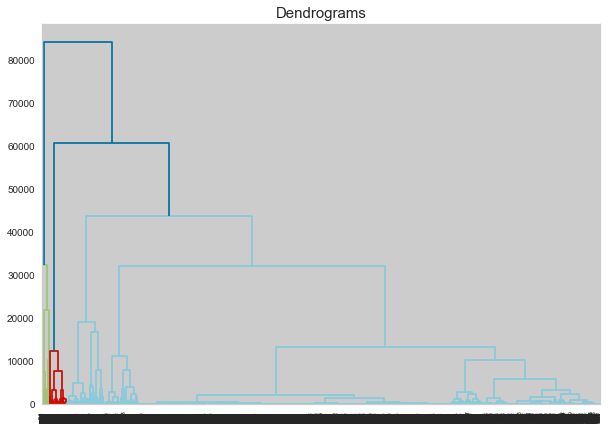

In [156]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms", fontsize = 15)  
dend = dendrogram(linkage(data, method='ward'))

The above plot represents the clustering diagram